In [73]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [38]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "figure.figsize": [5, 3]
})

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [126]:
data = pd.read_csv('complexity.csv')

In [127]:
data

,N,FMM,Direct
0,100,0.389614,0.386937
1,100,0.339177,0.351831
2,100,0.371489,0.352478
3,300,0.774177,3.177361
4,300,0.755495,3.176843
5,300,0.777728,3.293391
6,1000,3.197682,36.065493
7,1000,3.191977,36.317789
8,1000,3.206191,35.174757
9,3000,17.479646,310.331963


In [128]:
data.groupby(['N'])['FMM'].std()

N
100     0.025549
300     0.011944
1000    0.007153
3000    0.193898
Name: FMM, dtype: float64

In [129]:
data.groupby(['N'])['Direct'].std()

N
100     0.020084
300     0.067140
1000    0.600498
3000    5.644029
Name: Direct, dtype: float64

In [130]:
xvals = data['N'].unique()

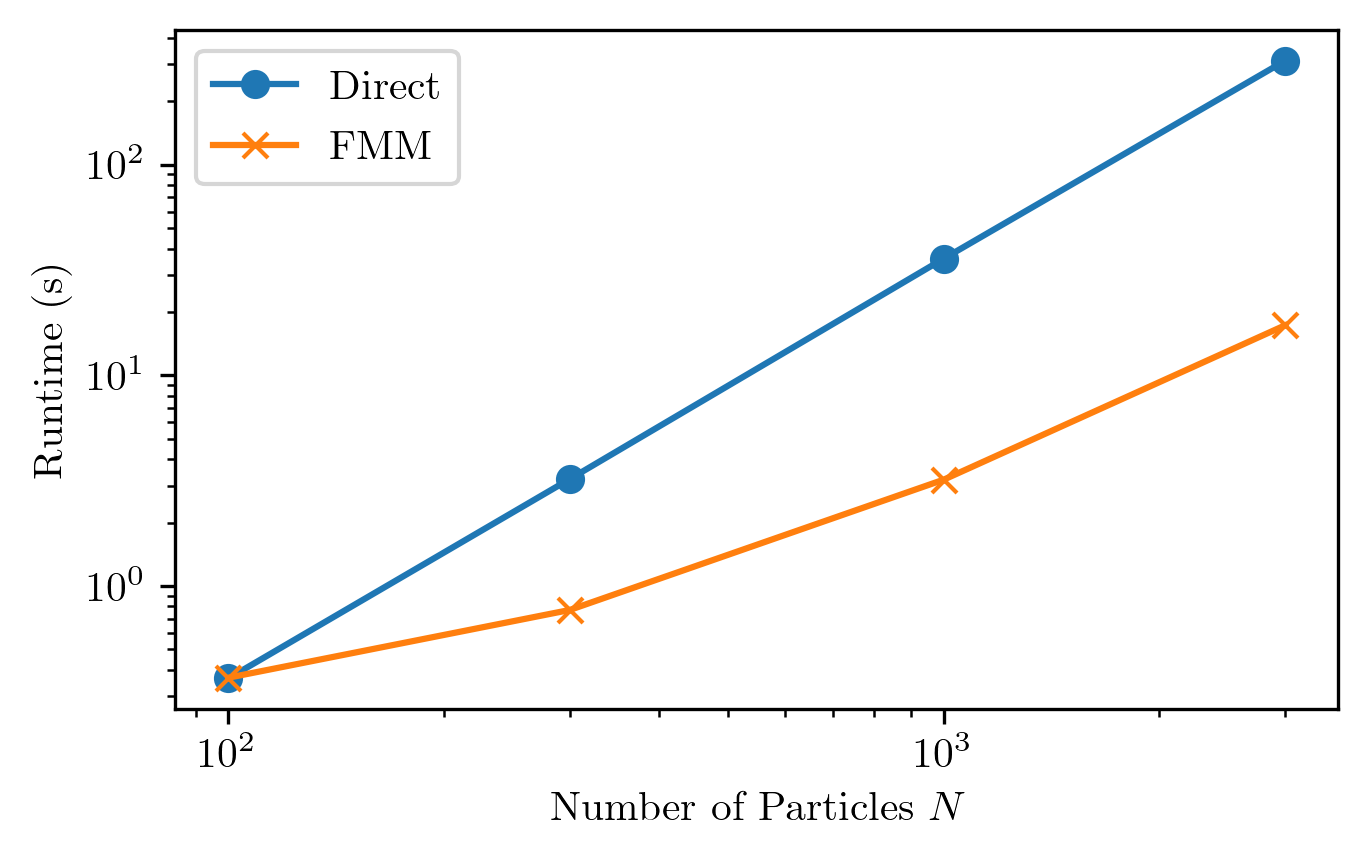

In [131]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(data.groupby(['N'])['Direct'].mean(), '-o', label='Direct')
ax.plot(data.groupby(['N'])['FMM'].mean(), '-x', label='FMM')
ax.set_xlabel('Number of Particles $N$')
ax.set_ylabel('Runtime (s)')
plt.legend()
plt.show()

In [132]:
direct_runtime = data.groupby(['N'])['Direct'].mean()
fmm_runtime = data.groupby(['N'])['FMM'].mean()

In [133]:
log_x = np.log(xvals)

In [134]:
yd = np.array(direct_runtime)
log_yd = np.log(yd)

yf = np.array(fmm_runtime)
log_yf = np.log(yf)

In [135]:
log_yf

array([-1.00304777, -0.26249094,  1.16271845,  2.85030797])

In [136]:
xvals

array([ 100,  300, 1000, 3000])

In [137]:
np.polyfit(log_x, log_yf, deg=1)

array([ 1.13859925, -6.49287179])

In [138]:
np.polyfit(log_x, log_yd, deg=1)

array([  1.98782737, -10.16489465])